Exploratory data analysis on property data collected in Ames, Iowa from 2006 to 2010

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train=pd.read_csv("train.csv",index_col="Id")
df_test=pd.read_csv("test.csv",index_col="Id")

In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
#Categorical variables 
categorical_features=df_train.select_dtypes(exclude=[np.number]) 
categorical_features.describe() 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [47]:
#numerical features 
numerical_features=df_train.select_dtypes(include=[np.number])
numerical_features.describe() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [57]:
#Missing values in numerical features
numerical_missing=numerical_features.isnull().sum().sort_values(ascending=False)
numerical_missing[numerical_missing>0]


LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

LotFrontage - Since each of the property will have linear feet of street connected, we can impute this feature with median or any other technique 

GarageYrBlt - This need not be imputed because this will not be available if there is no garage in the property

MasVnrArea - NA most likely means that there are no masonry veneer for the property. We can impute with 0


In [42]:
#Missing values in categorical features
categorical_missing=categorical_features.isnull().sum().sort_values(ascending=False)
categorical_missing[categorical_missing>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
dtype: int64

Categorical features having 'NA' can be filled with 'None' as the property does not have the amenity 


In [4]:
#Descriptive statistics about target variable
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

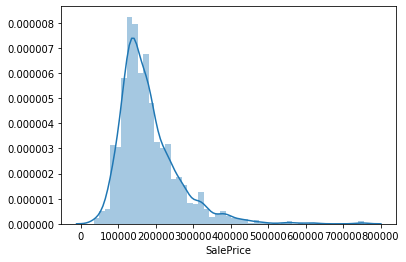

In [5]:
#Generate histogram to understand the distribution of SalesPrice
sns.distplot(df_train['SalePrice'])

In [13]:
#Skewness 
print("Skewness",df_train['SalePrice'].skew())

Skewness 1.8828757597682129


In [14]:
#Kurtosis 
print("Skewness",df_train['SalePrice'].kurt())

Skewness 6.536281860064529


Looking at the above histogram and statistics, we can infer that the attribute SalesPrice has positive skewness and slightly deviates from normal distribution (For normal distribution, the value of skewness and kurtosis is zero). This requires transformation (log) to increase the linearity of the data. It is important to reverse-transform (exp) predictions as they will be log-transformed as well


mu=12.02 and sigma=0.40



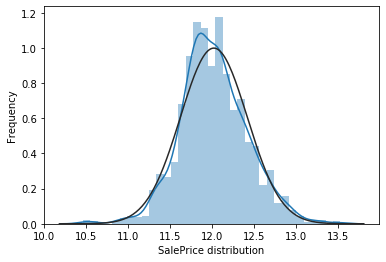

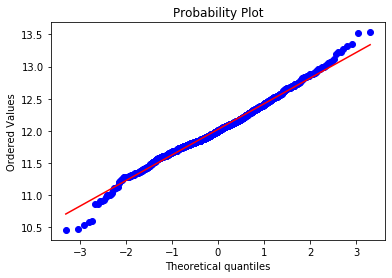

In [48]:
#If we apply log transformation, this is how the distribution looks like 
sns.distplot(np.log1p(df_train['SalePrice']),fit=norm) 
plt.ylabel('Frequency')
plt.xlabel('SalePrice distribution')

#Fitted parameters
(mu, sigma) = norm.fit(np.log1p(df_train['SalePrice']))
print('\nmu={:.2f} and sigma={:.2f}\n'.format(mu,sigma))


#Confirm that the skewness is corrected by generating a Q-Q plot 
fig=plt.figure() 
res=stats.probplot(np.log1p(df_train['SalePrice']),plot=plt)
plt.show()

In [69]:
#Checking skewness in numerical features 
df_skew = numerical_features.apply(lambda x: stats.skew(x)).sort_values(ascending=False)
df_skew = df_skew[abs(df_skew) > 0.75] 
df_skew

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
dtype: float64

These skewed features need to be transformed using log tranformation or box-cox transformation

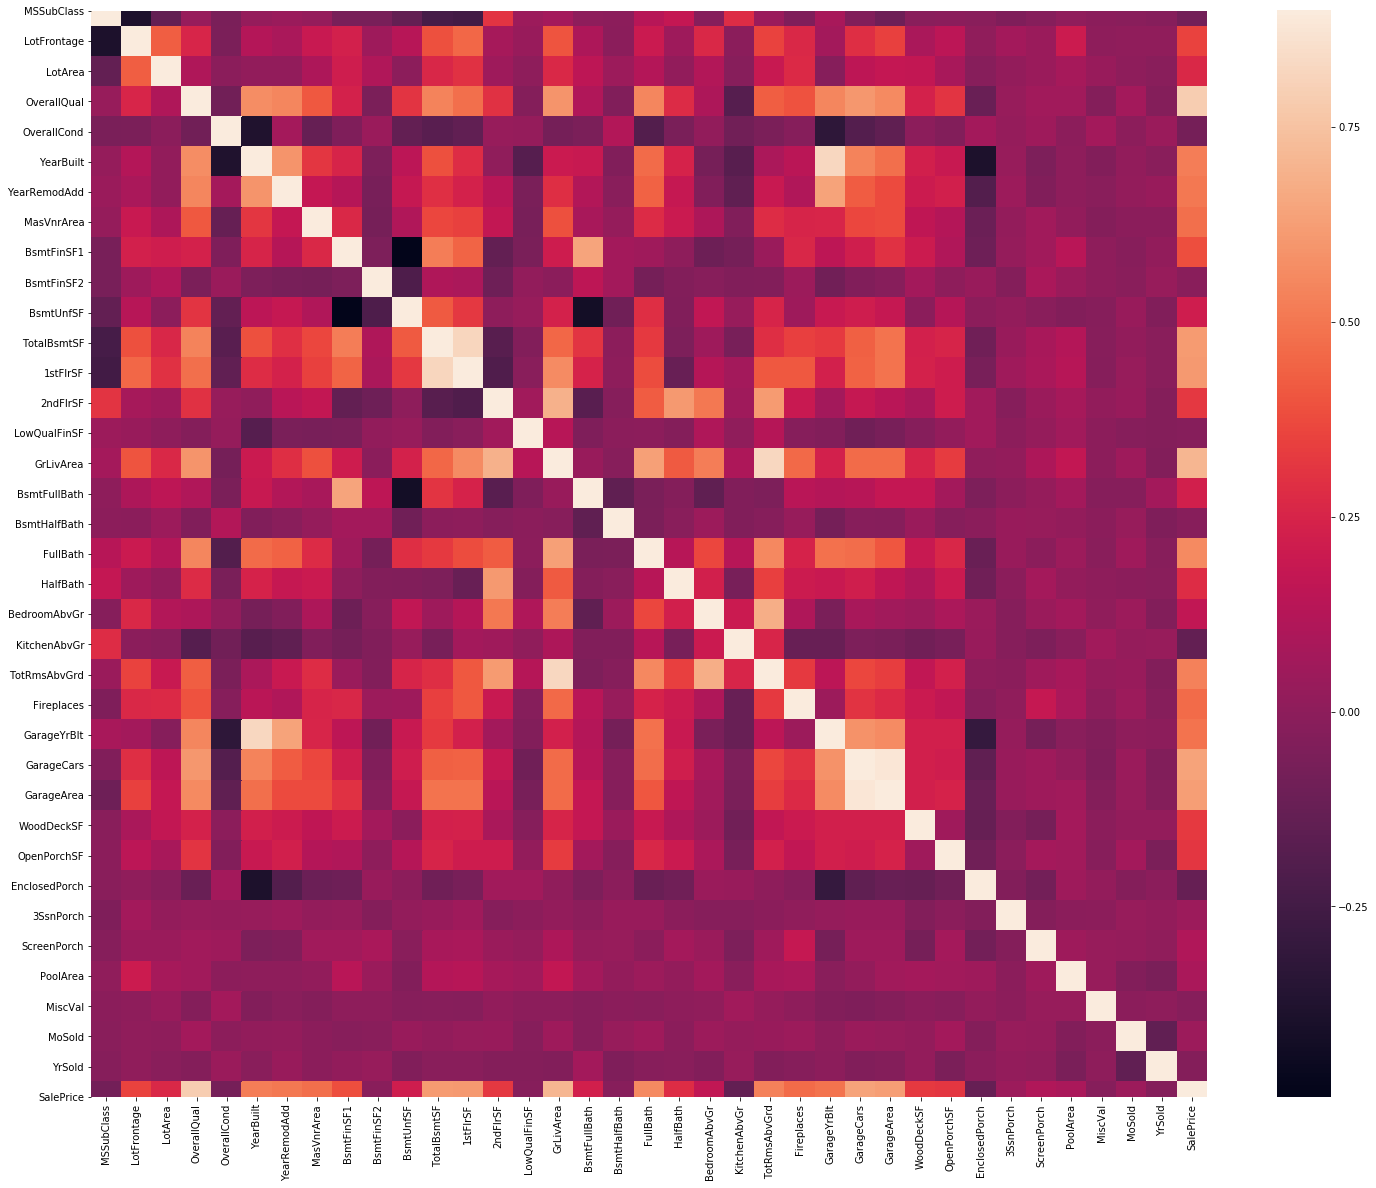

In [104]:
#Check correlation between features
corr=numerical_features.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(corr,vmax=0.9,square=True)

In [105]:
#Add highly correlated features to a set 
correlated_features = set()
for i in range(len(corr .columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            correlated_features.add(colname)

In [106]:
correlated_features

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'}

-GarageArea is highly correlated with GarageCars (i.e. size of garage in car capacity). One of these two attributes can be deleted

-GarageYrBlt is highly correlated with original construction date which is expected. Hence, GarageYrBlt can be removed

-TotalRmsAbvGrd is highly correlated with GrLivArea(Above grade (ground) living area square feet). One of these two attributes   can be removed
-1stFlrSF is highly correlated with TotalBsmtSF. 1stFlrSF cannot be greater than TotalBsmtSF. One of them can be removed (preferably TotalBsmtSF can be removed)

In [112]:
#Check features that are highly correlated with target variable SalePrice 
corr['SalePrice'].sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

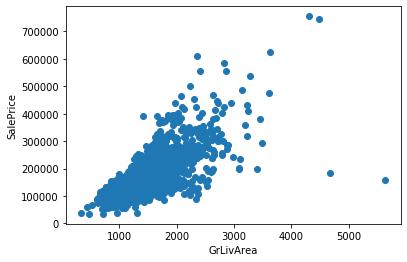

In [114]:
plt.scatter(x=df_train['GrLivArea'],y=df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

We can remove the observations that have GrLivArea>4000 but with SalesPrice less than 300K

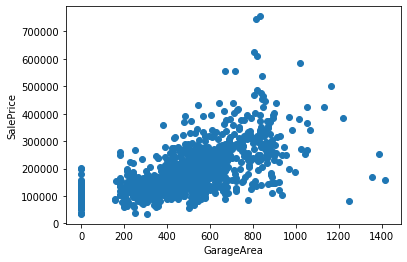

In [116]:
plt.scatter(x=df_train['GarageArea'],y=df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

We can remove the observations that have GarageArea>1200. These are considered outliers. Instead of looking for outliers in every feature, we can use models that are robust to outliers